In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'C:\Users\jibin\Downloads\beer-servings (1).csv')

In [10]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


## drop Unnamed: 0 

In [23]:
data=pd.read_csv(r'C:\Users\jibin\Downloads\beer-servings (1).csv',index_col='Unnamed: 0')

In [24]:
data.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


## Basics

In [26]:
data.shape

(193, 6)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 185 non-null    float64
 2   spirit_servings               185 non-null    float64
 3   wine_servings                 187 non-null    float64
 4   total_litres_of_pure_alcohol  192 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(4), object(2)
memory usage: 10.6+ KB


## Find missing values in data set

## one way

In [31]:
data.isna().sum()

country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

## another way

In [30]:
data.isnull().sum()


country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [35]:
num_cols=data[['country','beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol']]
num_cols.isna().sum()


beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
dtype: int64

## Imputation 
    
 ##   1)Simple imputer method


In [37]:
from sklearn.impute import SimpleImputer

   ## creating instance 

In [38]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

## fit data to imputer

In [39]:
imputer=imputer.fit(num_cols)

## transform numeric based on instance

In [40]:
num_cols=imputer.transform(num_cols)

In [41]:
type(num_cols)

numpy.ndarray

## to dataframe

In [45]:
num_cols=pd.DataFrame(num_cols,columns=[['country ','beer_servings','spirit_servings''wine_servings''total_litres_of_pure_alcohol','continent ']])

In [47]:
num_cols.isna().sum()

country                                                     0
beer_servings                                               0
spirit_servingswine_servingstotal_litres_of_pure_alcohol    0
continent                                                   0
dtype: int64

## remove numeric data

In [49]:
data.drop(['beer_servings','spirit_servings','wine_servings','total_litres_of_pure_alcohol'],inplace=True,axis=1)

In [50]:
data.head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


## adding data to data frame

In [51]:
data=pd.concat([num_cols,data],axis=1)

In [52]:
data.head()

,"(country ,)","(beer_servings,)","(spirit_servingswine_servingstotal_litres_of_pure_alcohol,)","(continent ,)",country,continent
0,0.0,0.0,0.0,0.0,Afghanistan,Asia
1,89.0,132.0,54.0,4.9,Albania,Europe
2,25.0,0.0,14.0,0.7,Algeria,Africa
3,245.0,138.0,312.0,12.4,Andorra,Europe
4,217.0,57.0,45.0,5.9,Angola,Africa


## 2nd method

## identifying skewness of data


In [53]:
freqgrap=data.select_dtypes(include=['float'])

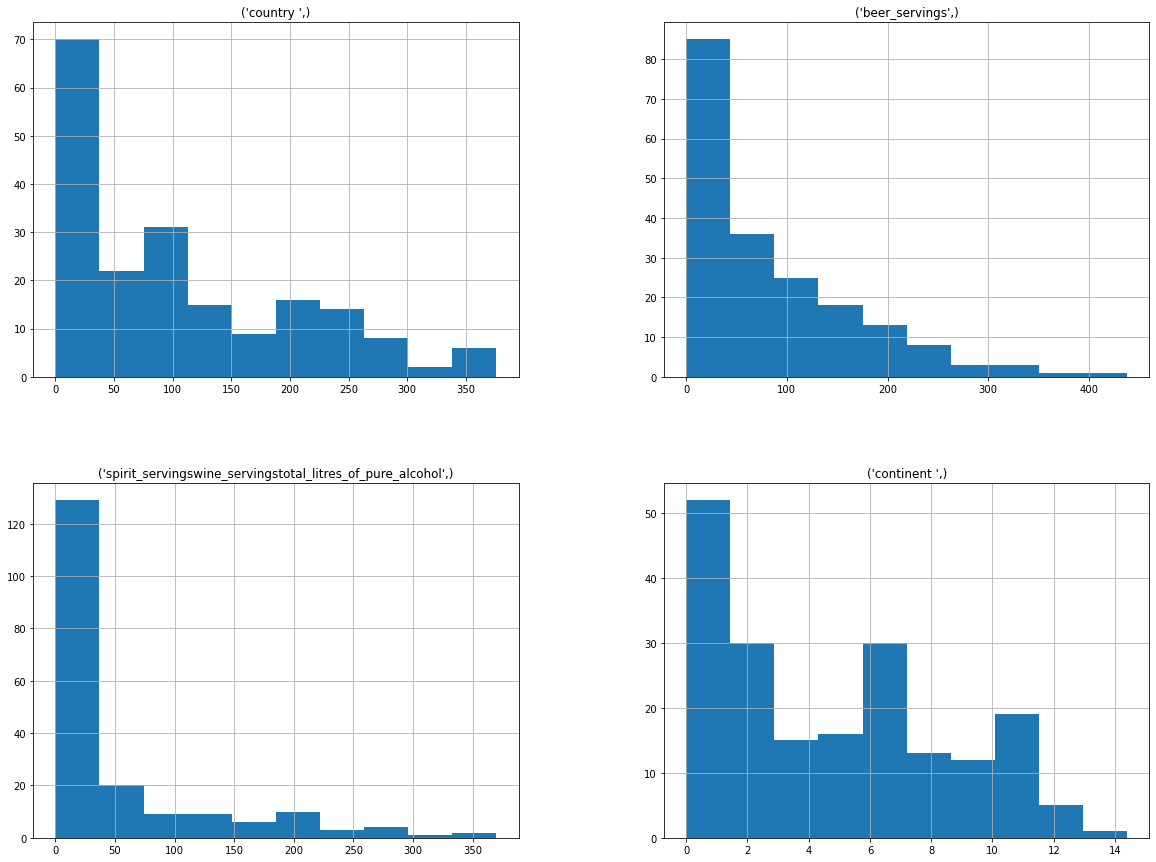

In [55]:
freqgrap.hist(figsize=(20,15))
plt.show()